In [11]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.figure_factory as FF

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib
%matplotlib inline
import seaborn as sns
# Bokeh
from bokeh.io import output_notebook
from bokeh.plotting import figure, show
from bokeh.models import HoverTool, CustomJS, ColumnDataSource, Slider
from bokeh.layouts import column
from bokeh.palettes import all_palettes
output_notebook()

Loading BokehJS ...

In [86]:
# set up fake data (remove when we have real data)
# import urllib.request
# import numpy as np

# word_url = "http://svnweb.freebsd.org/csrg/share/dict/words?view=co&content-type=text/plain"
# response = urllib.request.urlopen(word_url)
# long_txt = response.read().decode()
# words = long_txt.splitlines()

# random_word_indices = np.random.randint(0,25486,100)
# random_words = []
# random_term_frequency = []
# random_importance = []
# for index in random_word_indices:
#     random_words.append(words[index])
#     random_term_frequency.append(np.random.randint(1,500))
#     random_importance.append(np.random.random())

# term_frequency_vs_importance_df = pd.DataFrame({
#     'term': random_words,
#     'term-frequency': random_term_frequency,
#     'importance': random_importance
# })

# term_frequency_vs_importance_df.head()

,term,term-frequency,importance
0,infeasible,436,0.127641
1,cheekbone,362,0.239114
2,gable,164,0.760381
3,comb,222,0.979446
4,Switzer,13,0.367186


In [6]:
# Uncomment when this is given as a file
term_frequency_vs_importance_df = pd.read_csv('../backendOutput/term-frequency-vs-importance.csv')

term_frequency_vs_importance_df.head()

,term,term-frequency,importance
0,apple,100,0.9
1,circus,50,0.7
2,science,200,0.5


# Term-Frequency vs. Importance

This will take data in the format of:

```
term,term-frequency,importance
apple,105,0.5
orange,110,0.6
...
```

In [101]:
trace = go.Scatter(
    x=term_frequency_vs_importance_df['term-frequency'], 
    y=term_frequency_vs_importance_df['importance'],
    mode='markers', 
    text=term_frequency_vs_importance_df['term'],
    name='term-frequency vs. importance')

layout = go.Layout(title="Term-frequency vs. Importance",
                   xaxis={'title':'Importance'},
                   yaxis={'title':'Term-frequency'}
                  )

fig = go.Figure(data=[trace], layout=layout)

plot(fig, filename="../frontendOutput/term-frequency-vs-importance.html")

'file:///mnt/c/Users/forde/Documents/DataVisualization/DataVizMidterm/frontendOutput/term-frequency-vs-importance.html'

## Box-Plot for Average Document Length

In [13]:
# set up fake data (remove when we have real data)
import urllib.request
import numpy as np

word_url = "http://svnweb.freebsd.org/csrg/share/dict/words?view=co&content-type=text/plain"
response = urllib.request.urlopen(word_url)
long_txt = response.read().decode()
words = long_txt.splitlines()

random_word_indices = np.random.randint(0,25486,100)
random_document_name = []
random_number_of_words = []
for index in random_word_indices:
    random_document_name.append(words[index])
    random_number_of_words.append(np.random.randint(1,500))

document_length_df = pd.DataFrame({
    'document-name': random_document_name,
    'number-of-words': random_number_of_words,
})

document_length_df.head()

,document-name,number-of-words
0,fugitive,53
1,cornfield,497
2,pick,396
3,Gallagher,381
4,Cicero,133


In [102]:
trace = go.Box(
            name='Document Word Counts',
            y=document_length_df['number-of-words'],
            boxpoints='all'
)

data = [trace]

plot(data, filename="../frontendOutput/wordcount-boxplot.html")

'file:///mnt/c/Users/forde/Documents/DataVisualization/DataVizMidterm/frontendOutput/wordcount-boxplot.html'

# LDA Topics with t-SNE and Bokeh

In [16]:
ldamodel_df = pd.read_csv('../backendOutput/ldamodelAsMatrix.csv')

ldamodel_np = ldamodel_df.to_numpy();

In [17]:
from sklearn.manifold import TSNE

tsne = TSNE(random_state=2017, perplexity=30)
tsne_embedding = tsne.fit_transform(ldamodel_np)
tsne_embedding = pd.DataFrame(tsne_embedding, columns=['x','y'])
tsne_embedding['hue'] = ldamodel_np.argmax(axis=1)

In [106]:
source = ColumnDataSource(
    data=dict(
        x = tsne_embedding.x,
        y = tsne_embedding.y,
        colors = [all_palettes['Spectral'][10][i] for i in tsne_embedding.hue],

        alpha = [0.9] * tsne_embedding.shape[0],
        size = [7] * tsne_embedding.shape[0]
    )
)
hover_tsne = HoverTool(names=["ldamodel_df"], tooltips="""
    <div style="margin: 10">
        <div style="margin: 0 auto; width:300px;">
            <span style="font-size: 12px; font-weight: bold;">Title:</span>
            <span style="font-size: 12px">(Figure out what this would be)</span>
        </div>
    </div>
    """)
                      
tools_tsne = [hover_tsne, 'pan', 'wheel_zoom', 'reset']
plot_tsne = figure(plot_width=700, plot_height=700, tools=tools_tsne, title="20 News Groups")
plot_tsne.circle('x', 'y', size='size', fill_color='colors', 
                 alpha='alpha', line_alpha=0, line_width=0.01, source=source, name="ldamodel_df")

layout = column(plot_tsne)

In [110]:
from bokeh.resources import CDN
from bokeh.embed import file_html

html = file_html(layout, CDN, "ldamodel-tsne")

with open('../frontendOutput/ldamodel-tsne.html', 'w') as myFile:
    myFile.write(html)

In [19]:
show(layout)

# LDA Topics as Word Cloud

In [80]:
import csv
from ast import literal_eval

topics = []
with open('../backendOutput/topics.csv', 'r') as myfile:
    rows = myfile.readlines()
    for row in rows:
        topics.append(literal_eval(row))

[('i', 0.017049573), ('god', 0.011921607), ('the', 0.01077147), ('write', 0.0047879997), ('he', 0.004449174), ('-pron-', 0.0043893293), ('it', 0.0038834359), ('if', 0.0038281411), ('come', 0.0037052697), ('christian', 0.0036825868)]


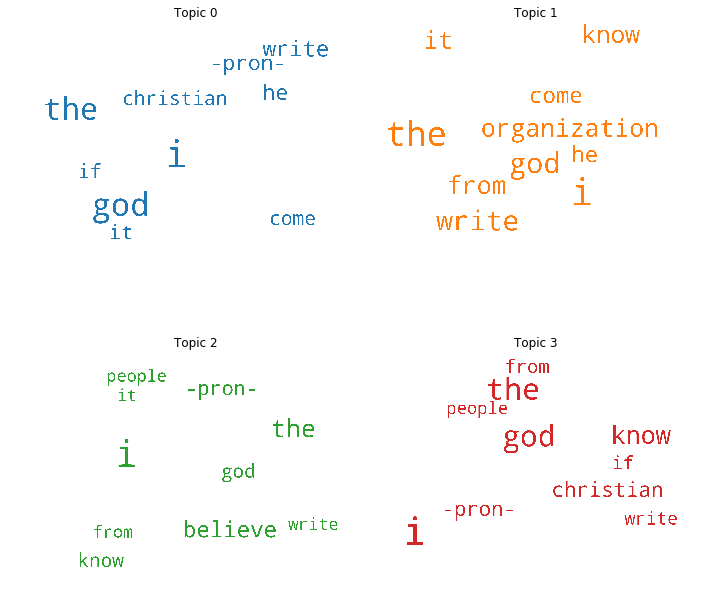

In [114]:
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'
cloud = WordCloud(background_color='white', 
                  width=2500, 
                  height=1800, 
                  max_words=20,
                 colormap='tab10',
                 color_func=lambda *args, **kwargs: cols[i],
                 prefer_horizontal=1.0)

fig, axes = plt.subplots(2,2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i))
    plt.gca().axis('off')
    
plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.savefig('../frontendOutput/ldamodel-wordcloud.png')
plt.show()

### LDA Model with pyLDAVis

In [87]:
## Not sure how to export/import ldamodel and corpus for this visualization

import pyLDAvis
import pyLDAvis.gensim

pyLDAvis.enable_notebook()
a = pyLDAvis.gensim.prepare(topic_model=ldamodel, corpus=bow, dictionary=dictionary)

pyLDAvis.save_html(a, "frontendOutput/ldamodel-pyLDAvis.html")

### K-Means Topic Clustering

In [96]:
kmeanslabels = []
with open('../backendOutput/kmeansLabels.csv', 'r') as myfile:
    rows = myfile.readlines()
    for row in rows:
        kmeanslabels.append(literal_eval(row))

In [97]:
tsne = TSNE(random_state=2017, perplexity=30)
tsne_embedding = tsne.fit_transform(kmeanslabels)
tsne_embedding = pd.DataFrame(tsne_embedding, columns=['x','y'])
tsne_embedding['hue'] = ldamodel_np.argmax(axis=1)

In [98]:
source = ColumnDataSource(
    data=dict(
        x = tsne_embedding.x,
        y = tsne_embedding.y,
        colors = [all_palettes['Spectral'][10][i] for i in tsne_embedding.hue],

        alpha = [0.9] * tsne_embedding.shape[0],
        size = [7] * tsne_embedding.shape[0]
    )
)
hover_tsne = HoverTool(names=["ldamodel_df"], tooltips="""
    <div style="margin: 10">
        <div style="margin: 0 auto; width:300px;">
            <span style="font-size: 12px; font-weight: bold;">Title:</span>
            <span style="font-size: 12px">(Figure out what this would be)</span>
        </div>
    </div>
    """)
                      
tools_tsne = [hover_tsne, 'pan', 'wheel_zoom', 'reset']
plot_tsne = figure(plot_width=700, plot_height=700, tools=tools_tsne, title="20 News Groups")
plot_tsne.circle('x', 'y', size='size', fill_color='colors', 
                 alpha='alpha', line_alpha=0, line_width=0.01, source=source, name="ldamodel_df")

layout = column(plot_tsne)

In [99]:
show(layout)